What is the most optimal skill to learn for data analysts?

Methodology

1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [2]:
#import all the necessary libraries
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

#load the data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\saxen\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#create a copy of the originaal df which contains only data analyst jobs specific to the us
df_DA_US=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()

In [4]:
#drop all the nan values from the salary_year_avg col
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

#explode the job_skills col to get the skills into individual rows
df_DA_US_exploded=df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [5]:
#now we will group the job_skills by median salary and count

#create a df in which we first groupby all the job_skills and then access the salary_year_avg col and apply aggfunc to it
#sort it by the count to get the top skills

df_DA_skills=df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

#since the count and median col are not named properly we will rename the column headers
df_DA_skills=df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})
df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [6]:
#we need a percent col
#we will use the df_DA_US to get the length of it and tht will provide us with the no of job postings

DA_job_count=len(df_DA_US)#this is a series

#now we will make a new col called skill_percent and it will be equal to => by accessing the skill_count col and dividing it with DA_job_count
df_DA_skills['skill_percent']=df_DA_skills['skill_count']/DA_job_count * 100

#now we dont need all the values to be shown
#lets take our skill_percent to be equal to 5
#we need all the skill_percent values >5 only
skill_percent=5

#now craete a new df which only contains skill_percent>5
#from our main df we accessed the skill_percent col and checking that if our skill_percent values>skill_percent show it in the new df
df_DA_skills_high_demand=df_DA_skills[df_DA_skills['skill_percent']>skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


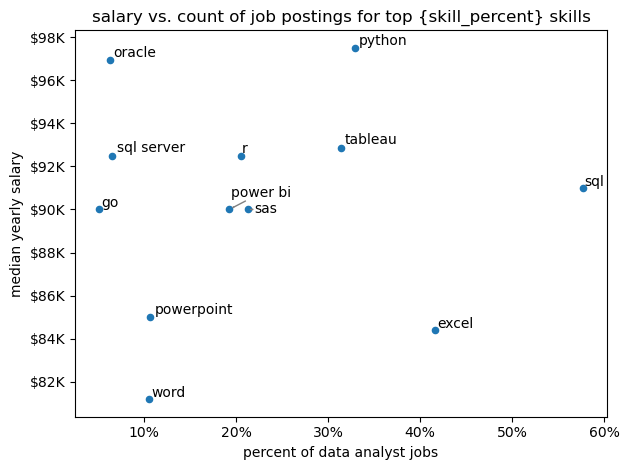

In [7]:
df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary')

#prepare text for adjustText
#create an empty list of text
#we are doing this so that each point gets a text(label) so that we understand what each point is representing
texts=[]

for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

#adjust text to avoid overlap
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray'))

#set axis,labels,title and legend
plt.xlabel('percent of data analyst jobs')
plt.ylabel('median yearly salary')
plt.title('salary vs. count of job postings for top {skill_percent} skills')

#well clean up the salary values on the yaxis
#first get the current axis
#funcformatter is a function used for re labelling using the lambda function
#for every y divide it by 1000 to remove decimals put a $before and K after
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))

#now we will also clean up the x axis and we put the percentformatter to convert the values into percentage
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

In [8]:
''' 
what is .index?

Think of a DataFrame like a table:
| Skill        | skill_count | median_salary |
|--------------|-------------|---------------|
| Python       | 150         | 95000         |
| SQL          | 200         | 90000         |
| Tableau      | 120         | 85000         |

In this table:

The columns are: skill_count, median_salary

The index is: Python, SQL, Tableau (the row labels on the far left)(the text that we need)

Why we used .index in the loop:
for i, txt in enumerate(df_DA_skills_high_demand.index):
    # txt will be: "Python", then "SQL", then "Tableau", etc.

'''

''' 
plt.text(x_position, y_position, text_to_display):
So we need to give it:
X position - where horizontally to put the text
Y position - where vertically to put the text
Text - what to write

Why we used df_DA_skills_high_demand['skill_count'].iloc[i]:
Let's imagine your data looks like this:

| Skill   | skill_count | median_salary |
|---------|-------------|---------------|
| Python  | 150         | 95000         |
| SQL     | 200         | 90000         |
| Tableau | 120         | 85000         |

When i = 0 (first loop):

df_DA_skills_high_demand['skill_count'].iloc[0] = 150 (Python's x-coordinate)

df_DA_skills_high_demand['median_salary'].iloc[0] = 95000 (Python's y-coordinate)

txt = "Python" (the label text)

So we're saying: "Put the text 'Python' at position (150, 95000) on the chart"

When i = 1 (second loop):

df_DA_skills_high_demand['skill_count'].iloc[1] = 200 (SQL's x-coordinate)

df_DA_skills_high_demand['median_salary'].iloc[1] = 90000 (SQL's y-coordinate)

txt = "SQL"

And so on...


'''

' \nplt.text(x_position, y_position, text_to_display):\nSo we need to give it:\nX position - where horizontally to put the text\nY position - where vertically to put the text\nText - what to write\n\nWhy we used df_DA_skills_high_demand[\'skill_count\'].iloc[i]:\nLet\'s imagine your data looks like this:\n\n| Skill   | skill_count | median_salary |\n|---------|-------------|---------------|\n| Python  | 150         | 95000         |\n| SQL     | 200         | 90000         |\n| Tableau | 120         | 85000         |\n\nWhen i = 0 (first loop):\n\ndf_DA_skills_high_demand[\'skill_count\'].iloc[0] = 150 (Python\'s x-coordinate)\n\ndf_DA_skills_high_demand[\'median_salary\'].iloc[0] = 95000 (Python\'s y-coordinate)\n\ntxt = "Python" (the label text)\n\nSo we\'re saying: "Put the text \'Python\' at position (150, 95000) on the chart"\n\nWhen i = 1 (second loop):\n\ndf_DA_skills_high_demand[\'skill_count\'].iloc[1] = 200 (SQL\'s x-coordinate)\n\ndf_DA_skills_high_demand[\'median_salary\'].

In [9]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [10]:
df_technology=df['job_type_skills'].copy()

#remove duplicates
df_technology=df_technology.drop_duplicates()

#remove nan values
df_technology=df_technology.dropna()

#combine all dictionaries into one
technology_dict={}
for row in df_technology:
    row_dict=ast.literal_eval(row) #convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key]+=value
        else:
            technology_dict[key]=value
            
for key, value in technology_dict.items():
    technology_dict[key]=list(set(value))
technology_dict

{'analyst_tools': ['sap',
  'dax',
  'powerpoint',
  'sheets',
  'tableau',
  'splunk',
  'outlook',
  'esquisse',
  'msaccess',
  'visio',
  'power bi',
  'excel',
  'alteryx',
  'ms access',
  'cognos',
  'sharepoint',
  'spreadsheet',
  'powerbi',
  'ssrs',
  'nuix',
  'sas',
  'spss',
  'looker',
  'qlik',
  'ssis',
  'datarobot',
  'microstrategy',
  'word'],
 'programming': ['c++',
  'ocaml',
  'shell',
  'kotlin',
  'lisp',
  'bash',
  'erlang',
  'haskell',
  'pascal',
  'groovy',
  'f#',
  'visualbasic',
  'ruby',
  'sass',
  'php',
  'lua',
  'powershell',
  'solidity',
  'typescript',
  'r',
  'html',
  'c',
  'julia',
  'css',
  'dart',
  'scala',
  'matlab',
  'vba',
  'go',
  'rust',
  'java',
  'vb.net',
  'clojure',
  'objective-c',
  'no-sql',
  'nosql',
  'python',
  'sql',
  'mongo',
  'c#',
  'mongodb',
  'swift',
  'sas',
  'perl',
  'elixir',
  'javascript',
  'golang',
  'fortran',
  'apl',
  'cobol',
  't-sql',
  'visual basic',
  'assembly',
  'delphi',
  'crys

In [11]:
#convert this into a dataframe
df_technology=pd.DataFrame(list(technology_dict.items()),columns=['technology','skills'])
#explode the skills col
df_technology=df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,dax
0,analyst_tools,powerpoint
0,analyst_tools,sheets
0,analyst_tools,tableau
...,...,...
9,sync,webex
9,sync,ringcentral
9,sync,microsoft teams
9,sync,zoom


In [12]:
#lets merge this back to the original df
df_plot=df_DA_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='skills')

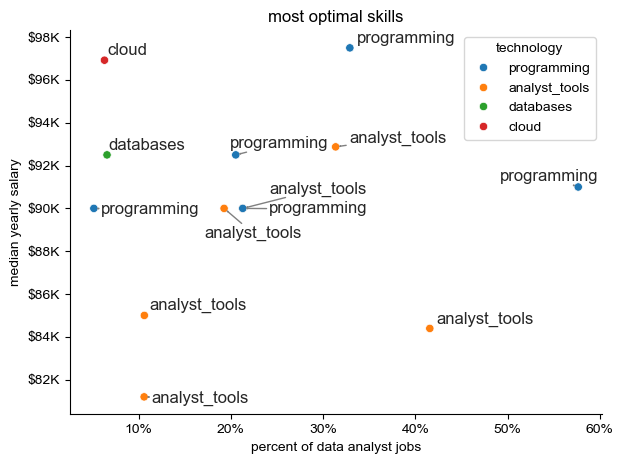

In [14]:
#df_plot.plot(kind='scatter',x='skill_percent',y='median_salary')
##now we need to color code this thts why use seaborn
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')
#prepare text for adjustText
#create an empty list of text
#we are doing this so that each point gets a text(label) so that we understand what each point is representing
texts=[]

for i,txt in enumerate(df_plot['technology']):
    texts.append(plt.text(df_plot['skill_percent'].iloc[i],df_plot['median_salary'].iloc[i],txt))

#adjust text to avoid overlap
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray'))

#set axis,labels,title and legend
plt.xlabel('percent of data analyst jobs')
plt.ylabel('median yearly salary')
plt.title('most optimal skills')

#well clean up the salary values on the yaxis
#first get the current axis
#funcformatter is a function used for re labelling using the lambda function
#for every y divide it by 1000 to remove decimals put a $before and K after
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))

#now we will also clean up the x axis and we put the percentformatter to convert the values into percentage
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()